<a href="https://colab.research.google.com/github/Alex-So-Ma/Fisica_Computacional_2023-1/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 3
####Física Computacional
####Alejandro Soto Malpica

##1. Polinomio de Taylor de la exponencial

Función que da los valores del polinomio de Taylor de la exponencial.

In [ ]:
import numpy as np
from math import exp

def exp_p(x):
  #Los primeros términos del polinomio
  term = 1
  sum = 1
  eps=1e-8
  n=2

  while abs(term/sum)>eps:
    term=term*x/(n-1)
    sum=sum+term
    n=n+1
  return sum

#Error respecto a la exp de math
e1=abs(exp_p(-20)-exp(-20))/exp(-20)
e2=abs(exp_p(0.1)-exp(0.1))/exp(0.1)
e3=abs(exp_p(20)-exp(20))/exp(20)
print(e1,e2,e3)

1.727542676201181 1.8180330193126684e-11 4.828737576193741e-09


Para 0.1 y 20 el valor es aceptable, para -20 hay un margen de error considerable.

##2. Datos de un río en Inglaterra

Gráfica del nivel de un río ingles.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

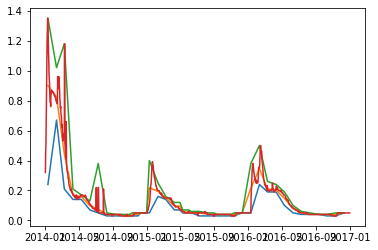

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Funciones que ayudan a escoger calumnas y celdas en el DataFrame
def month(i,j):
  y=str(2013+i)
  m=str(j)
  f=y+'-'+m
  return f

def month1(i,j,k):
  y=str(2013+i)
  m=str(j)
  d=str(k)
  f=y+'-'+m+'-'+d
  return f

#Primer data frame
df1 = pd.read_csv('T3_river-level.csv')
df1.rename ({'date': 'Date'}, axis='columns', inplace=True)

#Hacemos que la fechas sean índices para poder usarla al manipular los datos
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df1 = df1.set_index(['Date'])

#Creamos otro DataFrame que vamos a modificar
df2 = pd.read_csv('T3_river-level.csv')
df2['Daily average'] = df2['avg_level']
df2['Date']=df2['date']
df2['date'] = pd.to_datetime(df2['date'], dayfirst=True)
df2 = df2.set_index(['date'])

#Calculamos y remplazamos los valores mínimos, máximos y promedios
for i in range(1,4):
  for j in range(1,13):
    df2['min_level']['{var}'.format(var=month(i,j))]=df1.loc['{var}'.format(var=month(i,j)),'min_level'].min()
    df2['avg_level']['{var}'.format(var=month(i,j))]=(df1.loc['{var}'.format(var=month(i,j)),'avg_level'].sum())/int(len(df1.loc['{var}'.format(var=month(i,j)),'avg_level']))
    df2['max_level']['{var}'.format(var=month(i,j))]=df1.loc['{var}'.format(var=month(i,j)),'max_level'].max()

#Cambiamos los nombres de las columnas
df2.rename ({'min_level': 'Monthly minimum'}, axis='columns', inplace=True)
df2.rename ({'avg_level': 'Monthly average'}, axis='columns', inplace=True)
df2.rename ({'max_level': 'Monthly maximum'}, axis='columns', inplace=True)

#Creamos un tercer DataFrame para almacenar los datos mensuales un sola vez
df3=df2.dropna()

for i in range(1,4):
  for j in range(1,13):
    for k in range(int(len(df2[month(i,j)]))+1):
      if not k==10:
        df3['Monthly minimum']['{var}'.format(var=month1(i,j,k))]=None
        df3['Monthly average']['{var}'.format(var=month1(i,j,k))]=None
        df3['Monthly maximum']['{var}'.format(var=month1(i,j,k))]=None

df3=df3.dropna()

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(df3['Monthly minimum'])
ax1.plot(df3['Monthly average'])
ax1.plot(df3['Monthly maximum'])
ax1.plot(df2['Daily average'])
